# 8 - Deep Learning and Neural Networks

Replicate computation done by our brain with a Neural Network. Separate the two questions $\rightarrow$ how does a NN WORK? and how does a NN LEARN?

## 8.1 - The Neuron

It is the basic block of the NN. They are creat in analogy with actual Neurons in our brain, we recreate those into a machine. But how?

A neuron has got a body, dendrites and an axon.  Alone the neuron cant do much but a mln of them becomes very powerful. The dendrites are the receivers of the signal, and the axon passes the signals over to the next neuron through a synapse (which is actually a void space).

In ML the neuron gets a signal from inputs (mre than one) and has sends an output signals. The input corresponds to the senses of a person that sends electrical impulses to the brain. The brain is "just" a black box in that sense. Inouts are independent variable for A SINGLE OBSERVATION and they have to be standardized or normalized.

The output value can be continous, discrete or a categorical variable (represented through a dummy variable). A single observation in input, despite having a set of input values (for different indep. variables) becomes a single output observation. 

The connection between input and body is a synapse and it is associated to a weight $\rightarrow$ the weights $w$ are what gets updated from the NN and they are the updating process is learning method through which the NN works.

What does the body do?

1- $  \sum w_i x_i$ $\rightarrow$ weighted sums of the inputs $x_i$

2- $\varphi ( \sum w_i x_i ) $ $\rightarrow$ applies an activation function and according to the value decides whether to pass or not the signal.

3- The neuron eventually passes on the signal



## 8.2 - The Activation Function $\varphi$

We have ben mentioning the activation function $\varphi$. What is that? it decised whether the singal gets passed through. 4 main type of activation function

1 - Threshold function $\varphi$: if the value is less then $x_t$ then $\varphi(x) = 0$ else $\varphi(x)=1$

2 - Sigmoid $\varphi$: $$\varphi(x) = \frac{1}{1 + \exp(-x)} $$
where $x$ is a shortcut for $\sum w_i x_i$

3 - Rectifier $\varphi$: $$ \varphi(x) = \text{max}(x,0) $$

4 - Hyperpolic Tangent function $\varphi$: $$\varphi(x) = \frac{\sinh(x)}{\cosh(x)} = \frac{1- \exp(-2x)}{1+ \exp(-2x)} $$

## 8.3 - How does NN work?

House price evaluation (case study) $\rightarrow$ we pretend NN is already trained

Under the assumption that NN is already trained we can cover what the NN does. Say we have different parameters (Area, bedrooms, Distance to city center...) which form the input layer. The output would be calculated by the Neuron by weighing the elements of the input 

$$
 \text{output} = \sum_i w_i \text{input}_i
$$

The structure is simple enough such that many algorithms can be coded into that. If we add hidden layers to the Neural structure we see how the NN provides a better perfoming implementation. Hidden layers evaluate inputs assigning different weights to the input values. A single neuron can even be disregarding some input an be "focused" on some other. They perform then better calculation related to those input features alone and comprehend the correlation between those and the output.

Say neuron $N_i$ works only with inputs $x_1, x_3, x_7$. This is an algorithm that specifically searches for correlations between those input and the ouput. it does not care about the other input. $N_i$ fires up only if the correlation between the $x_j$ it selects is strong enough. With many neurons working like that, the flexibility is increased.


## 8.4 - How does NN learn?

1) Hard coded learning

2) Create a facility for the program in which we only specify the desired outcome feature, and the machine learns how to go from the input to the output

Perceptron

$$
\text{input}_1 ... \text{input_n} \rightarrow \text{single layer} \rightarrow \text{output}
$$

Say we have input values that have been supplied to perceptron, we get an output $y_o$, we plot it on a chart and we confront it with the supposed value $y$. we then calculate the Cost Function:

$$
C = \frac{1}{2}(y_o - y)^2
$$

which is in this case the error we have in our prediction (there are many possibile C functions). Once we have this value we feed it back to the NN and the weight get updated. Our goal is to find the weights that minimize the Cost Function.

What if we feed in several rows with input? We replicate the same perceptron for as many rows as we want. We then obtain a set $Y_o = \{ y_o^1 ... y_o^n\}$ and we confront that set with $Y= \{y^1 ... y^n\}$. The cost function becomes now

$$
C = \frac{1}{2}\sum_i (y_o^i - y^i)^2 
$$

The update procedure is done as before. Let remember that the NN was copied several times. So the update happens simmultaneously with the same values for all the copies. The goal is always the minimisation of the Cost Function.



## 8.5 - Gradient Descent

How we adjust the weights after back propagation? For a single row and a single neuron:

$$
C = \frac{1}{2} (y_o - y)^2
$$

the best way to find the minimum is to derive and solve the associated equation. In the case where we have several input and hidden layers we need to adjust for increase in dimensionality. Instead of just deriving we evaluate the gradient of the function

$$
\nabla C (x_1...x_n) = \sum_i \frac{\partial C}{\partial x_i }
$$


## 8.6 - Stochastic Gradient Descent

Gradient descent requires the C function to be convex. Stochastic GD accounts for the scenarios in which the C function is not convex. In GD we take all the rows, then compute the $\nabla$ and we then adjust the weights. In SGD we perform GD for each row separately, and adjusting every single weights after every iteration of GD. Stochastic GD avoids the possibility to find a local minimum, which results in a stop in the algorithm but in a non ideal output.


NEURAL NETWORK AND DEEP LEARNING - MICHAEL NIELSEN 2015

## 8.7 - Backpropagation

Backpropagation is the process that allows us to train the NN by adjusting the weights. It is as it explains which part of the error each element of the neural network is responsible for. So what happens during training?

1- Random initialisation of weights to small number close to 0

2- Input the first observation

3- Forward propagation limited by the weights

4- Comparison of prediction and actual value

5- Backpropagation and update of the weights

6- repeat 1 to 5 and update the weight each time or after a batch of observations.


In [23]:
#!pip install  tensorflow

In [24]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn; seaborn.set()
import tensorflow as tf

In [25]:
#the problem here is to understand from the dataset how a set of clients of a bank is likely to leave the bank according to some features we have been able to measure

#Import a dataset
dataset = pd.read_csv('Part 8 - Deep Learning/Section 39 - Artificial Neural Networks (ANN)/Churn_Modelling.csv') #name of the dataset

X = dataset.iloc[:, 3:-1].values #always check the relevant columns and adjust indexes
y = dataset.iloc[:, -1].values #modify extrems if necessary

In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder = 'passthrough') #column transformer for nationality
X = np.array(ct.fit_transform(X))

le = LabelEncoder()
X[:,4]=le.fit_transform(X[:,4])


In [27]:
#splitting into training and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =1)
#possibly different test_size

In [28]:
#FEATURE SCALING IS A MUST DO FOR NEURAL NETWORKS

#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train) #Per NN si usa anche sulle dummy variables
X_test = sc.transform(X_test)

print(X_train)
print(y_train)
print(X_test)
print(y_test)

[[-0.99850112  1.71490137 -0.57273139 ... -1.55337352  0.97725852
   0.42739449]
 [ 1.00150113 -0.58312392 -0.57273139 ... -1.55337352 -1.02327069
  -1.02548708]
 [-0.99850112  1.71490137 -0.57273139 ...  0.64376017  0.97725852
  -0.94479772]
 ...
 [ 1.00150113 -0.58312392 -0.57273139 ...  0.64376017  0.97725852
  -0.14096853]
 [ 1.00150113 -0.58312392 -0.57273139 ...  0.64376017  0.97725852
   0.01781218]
 [-0.99850112  1.71490137 -0.57273139 ...  0.64376017 -1.02327069
  -1.15822478]]
[0 0 1 ... 1 0 1]
[[ 1.00150113 -0.58312392 -0.57273139 ...  0.64376017  0.97725852
  -0.05360571]
 [ 1.00150113 -0.58312392 -0.57273139 ...  0.64376017 -1.02327069
  -0.58392685]
 [ 1.00150113 -0.58312392 -0.57273139 ... -1.55337352  0.97725852
  -0.16685331]
 ...
 [-0.99850112 -0.58312392  1.74601919 ... -1.55337352  0.97725852
   1.0669965 ]
 [-0.99850112  1.71490137 -0.57273139 ...  0.64376017  0.97725852
   1.13101314]
 [-0.99850112  1.71490137 -0.57273139 ...  0.64376017  0.97725852
  -0.88790165]

In [30]:
#initialize ANN as a sequence of layers
ANN = tf.keras.models.Sequential() #creation of an ANN as a sequence of layer

# add input and first layer
ANN.add(tf.keras.layers.Dense(units = 6, activation = 'relu')) #units is the number of neurons -> no rule of thumb, it's trial and error
#relu is the code name for the rectifier activation flunction

# add second layer
ANN.add(tf.keras.layers.Dense(units = 6, activation = 'relu')) 

# add output layer
ANN.add(tf.keras.layers.Dense(units=1, activation= 'sigmoid')) # 1 units because binary output, activation sigmoid because gives probability that the client leaves the bank not just the result 1-0

In [33]:
#compile ANN

ANN.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy']) # optimizer for SGD, loss function, metrics

#for non binary classification loss = 'categorical_cross_entropy'

In [34]:
#Train the ANN on the training set
ANN.fit(X_train, y_train, batch_size = 32, epochs = 100) # batch learning (number of prediction before update of the weights) 

Epoch 1/100
250/250 [==============================] - 0s 1ms/step - loss: 0.8393 - accuracy: 0.4289
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.6274 - accuracy: 0.7756
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.5815 - accuracy: 0.7951
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.5491 - accuracy: 0.7969
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.5057 - accuracy: 0.7969
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4697 - accuracy: 0.7996
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4508 - accuracy: 0.8054
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4397 - accuracy: 0.8112
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4317 - accuracy: 0.8155
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4257 - accura

In [58]:
# Test Prediction
test = np.array([1,0,0,600,1,40,3,60000,2,1,1,50000])
test=sc.transform(test.reshape(1,-1))

ANN.predict(test)


array([[0.04698795]], dtype=float32)

In [67]:
results = ANN.predict(X_test)
results = (results > 0.5)
#print(np.concatenate( (y_test.reshape(len(y_test),1), results.reshape(len(results),1)), axis=1 ))

from sklearn.metrics import confusion_matrix, accuracy_score

cf = confusion_matrix(y_test, results)
print('Confusion Matrix')
print(cf)
print(accuracy_score(y_test, results))

Confusion Matrix
[[1537   48]
 [ 219  196]]
0.8665


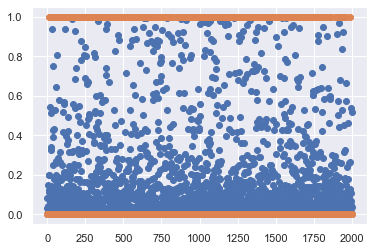

In [66]:
plt.scatter(range(len(X_test)),ANN.predict(X_test))
plt.scatter(range(len(X_test)),y_test)